In [6]:
import math
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt


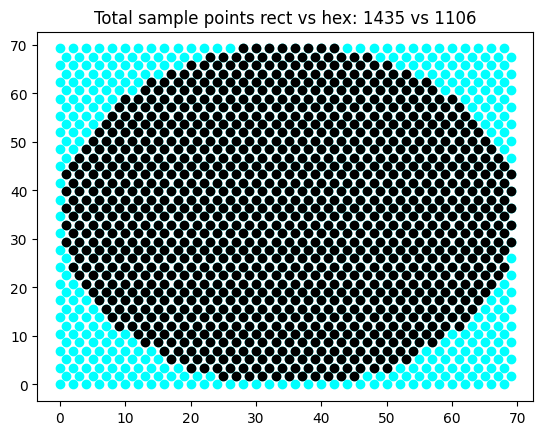

In [5]:
def generate_grid(arena_height, arena_width, spacing, is_hexagonal=False, is_cylinder=False):
    if is_hexagonal:
        hexagon_size = spacing / math.sqrt(3)
        num_columns = math.ceil(arena_width / (1.5 * hexagon_size))
        num_rows = math.ceil(arena_height / ((hexagon_size * math.sqrt(3))))

    else:
        num_columns = math.ceil(arena_width / spacing)
        num_rows = math.ceil(arena_height / spacing)
        
   
    if is_cylinder:
        radius_x = arena_width / 2
        radius_y = arena_height / 2
        # offset_x = (arena_width - num_columns * spacing) / 2  # Adjust the x-offset
        # offset_y = (arena_height - num_rows * spacing) / 2   
        # offset_y = offset_x
    else:
        radius_x = None
        radius_y = None
    
    offset_x = offset_y = 0

    if is_hexagonal:
        # print(offset_x, offset_y, num_columns, num_rows, hexagon_size)
        columns = range(num_columns)
        rows = range(num_rows)
        grid = list(
            map(
                lambda row: list(
                    map(
                        lambda col: (
                            col * (1.5 * hexagon_size) + offset_x,
                            row * (hexagon_size * math.sqrt(3)) + ((col % 2) * (hexagon_size * math.sqrt(3) / 2)) + offset_y
                        ),
                        filter(
                            lambda col: not radius_x or math.sqrt(
                                ((col * (1.5 * hexagon_size) + offset_x) - radius_x) ** 2 +
                                ((row * (hexagon_size * math.sqrt(3))) + ((col % 2) * (hexagon_size * math.sqrt(3) / 2)) - radius_y) ** 2
                            ) <= radius_x,
                            columns
                        )
                    )
                ),
                rows
            )
        )
    else:
        columns = range(num_columns)
        rows = range(num_rows)
        grid = list(
            map(
                lambda row: list(
                    map(
                        lambda col: (
                            col * spacing + offset_x,
                            row * spacing + offset_y
                        ),
                        filter(
                            lambda col: not radius_x or math.sqrt(
                                ((col * spacing + offset_x) - radius_x) ** 2 +
                                ((row * spacing + offset_y) - radius_y) ** 2
                            ) <= radius_x,
                            columns
                        )
                    )
                ),
                rows
            )
        )

    return list(chain.from_iterable(grid))


def plot_hexagonal_grid(points):
    # Extract x and y coordinates from the grid points
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]
    
    # Plot the hexagonal grid
    plt.scatter(x_coords, y_coords)
    plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio for x and y axes
    plt.show()

# EDIT HERE
arena_height = 70
arena_width = 70
spacing = 2

pts1 = generate_grid(arena_height, arena_width, spacing, is_hexagonal=True, is_cylinder=True)

pts2 = generate_grid(arena_height, arena_width, spacing, is_hexagonal=True, is_cylinder=False)

pts1 = np.array(pts1)
pts2 = np.array(pts2)

plt.scatter(pts2[:,1], pts2[:,0],color='cyan')
plt.scatter(pts1[:,1], pts1[:,0], color='k')
plt.title('Total sample points rect vs hex: {} vs {}'.format(len(pts2), len(pts1)))
plt.show()



In [4]:
import re
filename = '1-13_20210510-17-50x50cm-1200um-Test1'

pattern = r'^([^-]+)\_[0-9]{8}\-[0-9]{2}\-([^-]+)\-([^-]+)\-([^-]+)$'

match = re.match(pattern, filename)
print(match)

None


In [5]:
import re

filename = '1-97_20210510-17-50x50cm-1200um-Test1'
pattern = r'^([^-]+)-([^-]+)_([0-9]{8})-[0-9]{2}-([^-]+)-([^-]+)-([^-]+)$'

match = re.match(pattern, filename)
if match:
    print("Match found!")
else:
    print("No match found.")


Match found!


In [3]:
# # save 
# pth = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\border_control_dist_max.npy"
# # save as npy
# np.save(pth, grid)

NameError: name 'grid' is not defined

(14200,)
0.0352228112297364
-0.7886524823608205
-0.4327258185902317


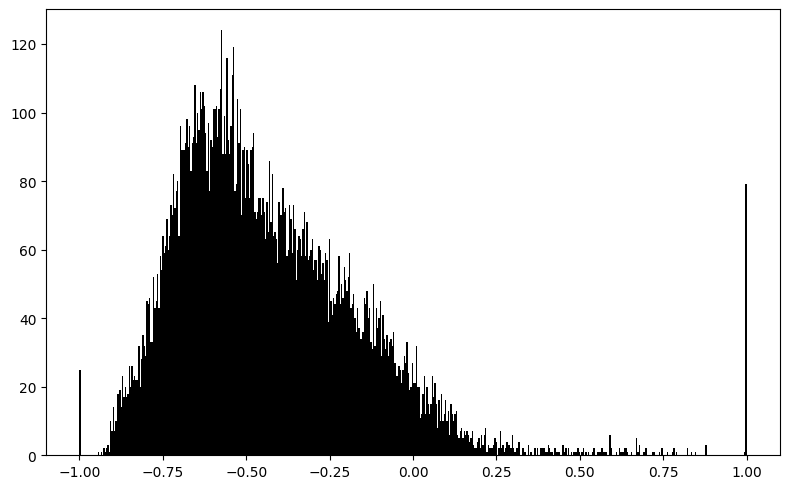

In [13]:
pth = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\border_control_dist_max.npy"

grid = np.load(pth, allow_pickle=True)
grid = grid.flatten()
# grid = grid[grid < 0.9]
print(grid.shape)
# plot hist

fig = plt.figure(figsize=(8,5))
plt.hist(grid, bins=500, color='k')
print(np.percentile(grid, 95))
print(np.percentile(grid, 5))
print(np.mean(grid))

# ax = plt.subplot(2,2,1)
# ax.hist(grid[:,0], bins=100, color='k')
# ax.set_title('Border Score Top')
# ax = plt.subplot(2,2,2)
# ax.hist(grid[:,1], bins=100, color='k')
# ax.set_title('Border Score Bottom')
# ax = plt.subplot(2,2,3)
# ax.hist(grid[:,2], bins=100, color='k')
# ax.set_title('Border Score Left')
# ax = plt.subplot(2,2,4)
# ax.hist(grid[:,3], bins=100, color='k')
# ax.set_title('Border Score Right')

fig.tight_layout()
plt.show()


(11500,)
(11500,)


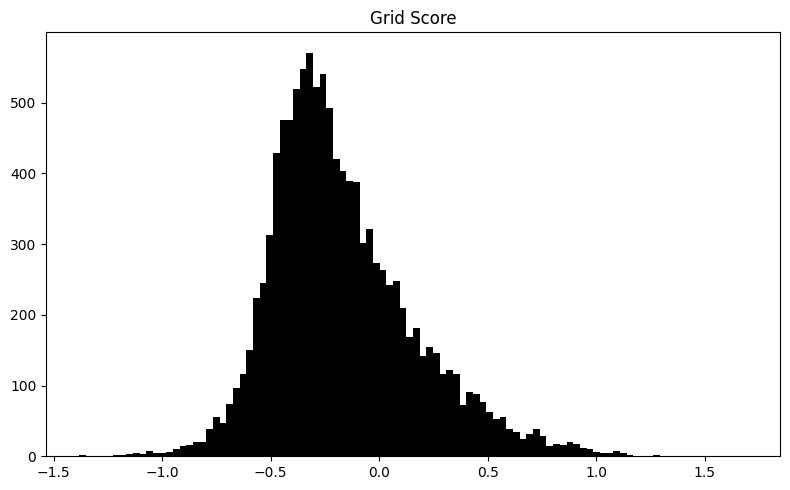

0.46757550018201666


In [22]:
pth = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\grid_control_dist.npy"
# pth = ses1_pth_control

grid = np.load(pth, allow_pickle=True)
print(grid.shape)
grid = grid[grid == grid]
print(grid.shape)

# plot hist

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)
ax.hist(grid, bins=100, color='k')
ax.set_title('Grid Score')

fig.tight_layout()
plt.show()

# 95th percentile
print(np.percentile(grid, 95))


In [11]:
import pandas as pd

pth = r"C:\Users\aaoun\Downloads\shuffles_grid_fixed_combined.xlsx"
test = pd.read_excel(pth)
mn = 0.46757550018201666


valid = test[test['grid_score'] >= mn]
unq_idx = ['Tetrode', 'Cell ID', 'name', 'date']
valid = valid.groupby(unq_idx).first().reset_index()
to_print = valid[np.hstack([unq_idx, ['grid_score']])]
# print but drop the index
print(to_print.to_string(index=False))
print(to_print.shape)
# print counts by name
print(to_print['name'].value_counts())


 Tetrode  Cell ID name     date  grid_score
       1        1 1-20 20210531    0.790688
       1        1 1-20 20210601    1.154278
       1        1 1a23 20210927    0.514776
       1        3 1-28 20220120    0.719259
       1        4 1a27 20220208    0.484026
       2        1 1-24 20210823    1.035337
       2        1 1-24 20210824    0.973285
       2        1 1-28 20220119    0.802504
       2        1 1-28 20220120    0.625102
       2        2 1-13 20210510    0.469545
       2        2 1-13 20210511    0.796584
       2        2 1a21 20210812    0.770603
       2        2 1a27 20220207    0.862471
       2        2 1a40 20230119    0.662432
       2        3 1-25 20210910    1.188793
       2        4 1a35 20221205    0.534656
       2        7 1a23 20210927    0.480726
       3        1 1-20 20210531    1.007499
       3        1 1a27 20220208    0.487399
       3        2 1-28 20220120    0.794502
       3        2 1a37 20221221    0.738817
       3        3 1a37 20221221 

In [8]:
# get index where grid score is nan
nan_idx = np.argwhere(np.isnan(grid))
print(nan_idx)

[]


In [9]:
pth = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\gar_corrected_combined_border_grid.xlsx"
import pandas as pd
df = pd.read_excel(pth)

df = df[df['session_ids'] == "['session_1', 'session_2']"]

colnames = ['name','tetrode','unit_id']
df = df[colnames]
# # get unique cell count per animal
df = df.groupby(['name','tetrode']).nunique()
print(df)

              unit_id
name tetrode         
1-13 1              4
     2              4
     3              8
     4              1
1-14 1              3
     2              1
     3              4
1-20 1              2
     2              3
     3              6
     4              1
1-24 2              3
     3              3
     4              3
1-25 2              3
     3              5
     4              4
1-28 1              4
     2              3
     3              7
     4              4
1-30 1              2
     2              6
     3              7
     4              6
1-34 1              4
     2              3
     3              3
     4              3
1a23 1              8
     2             10
     3              5
     4              4
1a27 1              5
     2              7
     3              1
     4              2
1a35 1              1
     2              5
     3              5
     4              7
1a37 1              4
     2              1
     3    

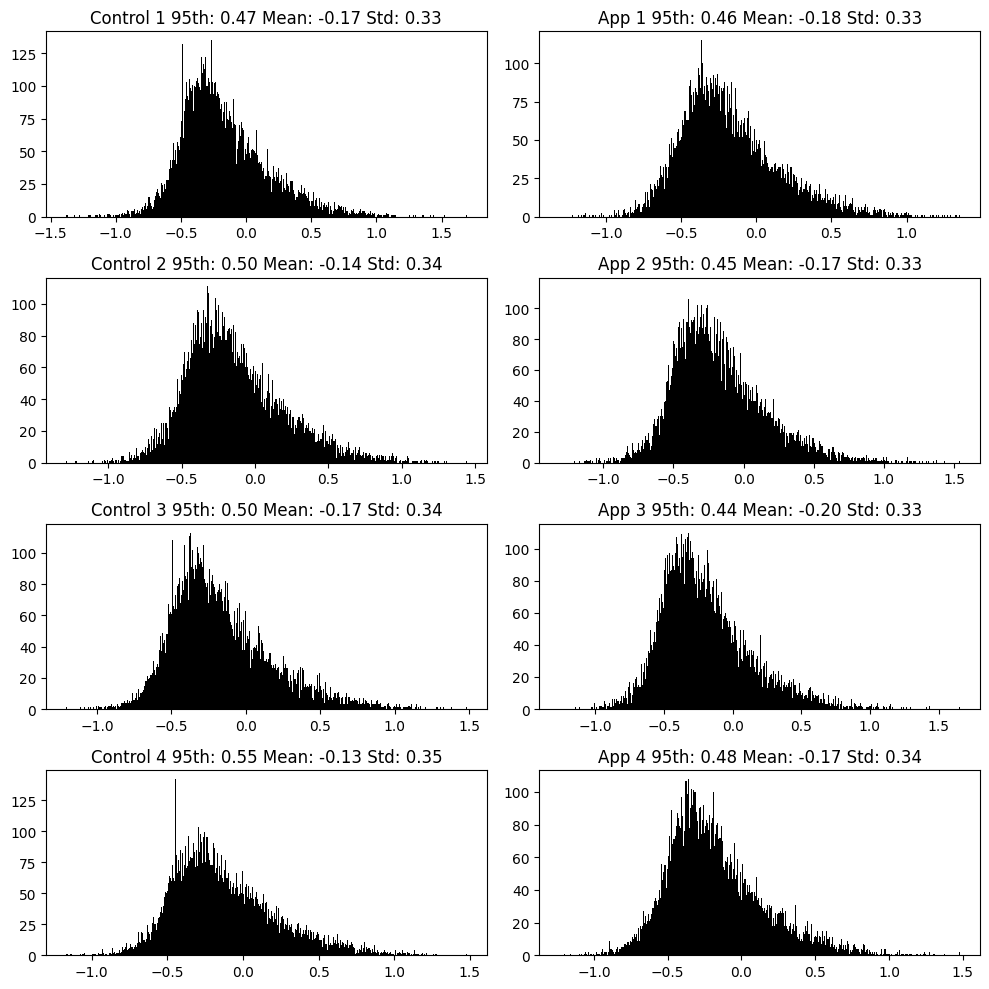

In [27]:
ses1_pth_control = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\control_dists\control_dists_opexebo_fxn\border_control_dist_ses1.npy"
ses2_pth_control = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\control_dists\control_dists_opexebo_fxn\border_control_dist_ses2.npy"
ses3_pth_control = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\control_dists\control_dists_opexebo_fxn\border_control_dist_ses3.npy"
ses4_pth_control = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\control_dists\control_dists_opexebo_fxn\border_control_dist_ses4.npy"

ses1_pth_app = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\control_dists\control_dists_opexebo_fxn\border_app_dist_ses1.npy"
ses2_pth_app = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\control_dists\control_dists_opexebo_fxn\border_app_dist_ses2.npy"
ses3_pth_app = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\control_dists\control_dists_opexebo_fxn\border_app_dist_ses3.npy"
ses4_pth_app = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\control_dists\control_dists_opexebo_fxn\border_app_dist_ses4.npy"

# make fig of 2 columns and 4 rows for all the histograms of the paths above
pths = [ses1_pth_control, ses1_pth_app, ses2_pth_control, ses2_pth_app, ses3_pth_control, ses3_pth_app, ses4_pth_control,
        ses4_pth_app]

fig = plt.figure(figsize=(10,10))
for i, pth in enumerate(pths):
    grid = np.load(pth, allow_pickle=True)
    grid = grid[grid == grid]
    grid = grid.flatten()
    ax = plt.subplot(4,2,i+1)
    # print(len(grid))
    ax.hist(grid, bins=500, color='k')
    # grid = grid[grid < 1]
    # grid = grid[grid > -1]
    percentile = np.percentile(grid, 95)
    mn = np.mean(grid)
    std = np.std(grid)
    controlorapp = 'Control' if '_control' in pth else 'App'     
    sesid = pth.split('_ses')[-1].split('.')[0]
    title = f'{controlorapp} {sesid} 95th: {percentile:.2f} Mean: {mn:.2f} Std: {std:.2f}'
    ax.set_title(title)

fig.tight_layout()
plt.show()
